### FRE-GY 6901, Volatility Models, Master of Science in Financial Engineering, NYU Tandon, Fall 2024
# Homework week 6: Computing assignment

### Due Date: 10:00 AM Tuesday, October 22, 2024
You should turn in the notebook on Brightspace.

The computing assignment is about the particle method for smile calibration.

Please comment your code properly.

Before you turn in the notebook, press the "Run all cells" button in the toolbar, and make sure all the calculation results and graphs are produced correctly in a reasonable time frame, and then save the notebook.

<h3 style="color:deepskyblue">The Particle Method for Smile Calibration</h3>

Consider the stochastic local volatility (SLV) model

$$
\begin{array}{l}
dS_t = a_t l(t, S_t) S_t dW^{(1)}_t\\
a_t=\sigma_0 e^{Y_t}\quad\text{where}\quad d Y_t = -\kappa Y_tdt+\gamma dW^{(2)}_t\\
d \langle W^{(1)}, W^{(2)} \rangle_t = \rho dt.
\end{array}
$$

The numerical values for the model parameters are
- $T = 1$.
- $S_0 = 100$.
- $\sigma_0 = 15\%$.
- $Y_0 = 0$.
- $\rho = -50\%$.
- $\gamma = 50\%$.
- $\kappa = 1$.

The goal is to find a leverage function $l(t, S)$ so that this model matches the market prices of vanilla options. For the sake of simplicity, we assume that the market implied volatility surface is flat $\sigma_{\textrm{Market}} \equiv 15\%$. In that case, we also have $\sigma_{\textrm{Dup}}(t,S) \equiv 15\%$.

Below we describe a Monte Carlo simulation scheme for the SLV model.

First we discretize the interval $(0,T)$ into subintervals $(t_{i-1}, t_i)$, $1\leq i\leq n$, and set $\Delta t_i=t_i-t_{i-1}$.

The Ornstein-Uhlenbeck process $Y$ is explicitly solvable:
\begin{equation}
Y_{t_i}=e^{-\kappa\Delta t_i}Y_{t_{i-1}}+\int_{t_{i-1}}^{t_i}\gamma e^{-\kappa\left(t_i-s\right)}dW_s^{(2)}.
\end{equation}

Therefore for given $Y_{t_{i-1}}$, $Y_{t_i}$ is a Gaussian variable with
\begin{equation}\tag{1}
\mathbb{E}\left[\left.Y_{t_i}\right\vert Y_{t_{i-1}}\right]=e^{-\kappa\Delta t_i}Y_{t_{i-1}},\quad
\text{Var}\left[\left.Y_{t_i}\right\vert Y_{t_{i-1}}\right]=\frac{\gamma^2}{2\kappa}\left(1-e^{-2\kappa\Delta t_i}\right)
\end{equation}

so that paths of $Y$ can be simulated exactly.

To simulate the spot process $S$, we use the Euler scheme:
$$\log S_{t_i}-\log S_{t_{i-1}}=-\frac{1}{2}\sigma_0^2e^{2Y_{t_{i-1}}}l(t_{i-1},S_{t_{i-1}})^2\Delta t_i+\sigma_0 e^{Y_{t_{i-1}}}l(t_{i-1},S_{t_{i-1}})\int_{t_{i-1}}^{t_i}dW^{(1)}_t$$

Thus for given $S_{t_{i-1}}$ and $Y_{t_{i-1}}$, $\log S_{t_i}$ and $Y_{t_i}$ are jointly Gaussian variables with

\begin{equation}\tag{2}
\mathbb{E}\left[\left.\log S_{t_i}\right\vert S_{t_{i-1}},Y_{t_{i-1}}\right]=\log S_{t_{i-1}}-\frac{1}{2}\sigma_0^2e^{2Y_{t_{i-1}}}\Delta t_i,\quad\text{Var}\left[\left.\log S_{t_i}\right\vert S_{i_{i-1}}, Y_{t_{i-1}}\right]=\sigma_0^2e^{2Y_{t_{i-1}}}l(t_{i-1},S_{t_{i-1}})^2\Delta t_i
\end{equation}

\begin{equation}\tag{3}
\text{Cov}\left[\left.Y_{t_i},\log S_{t_i}\right\vert S_{t_{i-1}}, Y_{t_{i-1}}\right]=\sigma_0 e^{Y_{t_{i-1}}}l(t_{i-1},S_{t_{i-1}})\frac{\gamma\rho}{\kappa}\left(1-e^{-\kappa\Delta t_i}\right)
\quad\text{or}\quad
\text{Corr}\left[\left.Y_{t_i},\log S_{t_i}\right\vert S_{t_{i-1}}, Y_{t_{i-1}}\right]=\rho\sqrt{\frac{2(1-e^{-\kappa\Delta t_i})}{\kappa\Delta t_i(1+e^{-\kappa\Delta t_i})}}
\end{equation}

Over the time interval $[t_{i-1}, t_i]$, we can advance $\log S$ and $Y$ by generating Gaussian variables $\log S_{t_i}$ and $Y_{t_i}$ using equations (1)-(3). That is,

\begin{align}
\log S_{t_i} &= \log S_{t_{i-1}}-\frac{1}{2}\sigma_0^2e^{2Y_{t_{i-1}}}l(t_{i-1},S_{t_{i-1}})^2\Delta t_i+\sigma_0e^{Y_{t_{i-1}}}l(t_{i-1},S_{t_{i-1}})\sqrt{\Delta t_i}\left(\sqrt{1-\bar{\rho}^2}Z_1+\bar{\rho}Z_2\right),\quad\text{where }\bar{\rho}=\rho\sqrt{\frac{2(1-e^{-\kappa\Delta t_i})}{\kappa\Delta t_i(1+e^{-\kappa\Delta t_i})}}\\
Y_{t_i} &= e^{-\kappa\Delta t_i}Y_{t_{i-1}}+\gamma\sqrt{\frac{1-e^{-2\kappa\Delta t_i}}{2\kappa}}Z_2
\end{align}
where $Z_1$ and $Z_2$ are independent standard normal variables.

<b>(a).</b> Implementation of the Particle Method.
- Implement the particle method studied in class to find the leverage function $l$. We suggest that you use the quartic kernel

$$K(x)=(x+1)^2(1-x)^2\quad\text{for }-1\leq x\leq 1\quad\text{and}\quad0\quad\text{ elsewhere}$$

together with the bandwidth

$$h = \kappa \sigma_{\mathrm{Market}} S_0 \sqrt{\max(t_k,0.15)}N^{-0.2}$$

at discretization date $t_k$. Make sure to fine-tune the dimensionless bandwidth parameter $\kappa$. Its order of magnitude is 1.0. Use $\Delta t = 1/100$, $N=10,000$ paths. Note: In class, we described an acceleration technique that involves sorting the "particles" $(S_{t_k},a_{t_k})$ according to the spot value $S_{t_k}$. Since the kernel we have chosen has compact support and is fairly inexpensive to evaluate, you may ignore this acceleration technique here. This means that each estimation of a conditional expectation $\mathbb{E}\left[\left.a_{t_k}^2\right\vert S_{t_k}=x\right]$ (for $x$ in a grid $G_{t_k}$ of spot values) involves the ratio of two sums of $N$ terms each. For the minimum and maximum values of $G_{t_k}$, take the 0.1% and 99.9% quantiles of the risk-neutral distribution of $S$ at $t_k$, i.e., since the smile is flat at $\sigma_{\textrm{Market}}$, of the distribution of $S_0\exp(\sigma_{\textrm{Market}}\sqrt{t_k}G - \frac12 \sigma_{\textrm{Market}}^2 t_k)$, with $G$ a standard Gaussian random variable.

- Check that the resulting model is indeed calibrated to the market implied volatilities $\sigma_{\textrm{Market}} \equiv 15\%$. To this end, compute estimates of the call prices (maturity $T=1$) in the calibrated model for strikes $70, 80, 90, 100, 110, 120, 130, 140$, and invert the Black-Scholes formula to get the corresponding estimation of the implied volatilities $\hat\sigma(T,K)$. To estimate the call prices in the calibrated model, simulate a new set of independent paths with the calibrated leverage function $l$ and $N_2 = 100,000$ paths. For the inversion of the Black-Scholes formula, you can use the function <code>blackscholes_impv</code> provided below.

<b>(b).</b> Fix the spot-vol correlation $\rho = 0\%$ and mean reversion $\kappa=1$. We study the impact of volatility of volatility $\gamma$ on the smile in the pure stochastic volatility model and calibrated leverage function in the SLV model. Perform the following tasks with various values of $\gamma$. Suggested values of $\gamma$: $0\%$, $25\%$, $50\%$, $75\%$.
- Recalibrate the leverage function $l(t,S)$ for each $\gamma$, and plot the calibrated leverage function $l(t, S)$ as a function of the spot value $S$ for a fixed maturity, e.g., $t = T$ with various values of $\gamma$ in the same graph. Comment on the dependence of the shape of the leverage function on $\gamma$.
- Plot the corresponding smile at maturity $T$ for the pure stochastic volatility model (set the leverage function $l \equiv 1$) with the various values of $\gamma$ in the same graph. Comment on the dependence of the shape of the smile on $\gamma$.

<b>(c).</b> Fix the volatility of volatility $\gamma = 50\%$ and mean reversion $\kappa=1$. We study the impact of spot-vol correlation $\rho$ on the smile in the pure stochastic volatility model and calibrated leverage function in the SLV model. Perform the following tasks with various values of $\rho$. Suggested values of $\rho$: $-50\%$, $0\%$, $50\%$.
- Recalibrate the leverage function $l(t,S)$ for each $\rho$, and plot the calibrated leverage function $l(t, S)$ as a function of the spot value $S$ for a fixed maturity, e.g., $t = T$ with various values of $\rho$ in the same graph. Comment on the dependence of the shape of the leverage function on $\rho$.
- Plot the corresponding smile at maturity $T$ for the pure stochastic volatility model (set the leverage function $l \equiv 1$) with the various values of $\rho$ in the same graph. Comment on the dependence of the shape of the smile on $\rho$.

<b>(d).</b> Fix the spot-vol correlation $\rho = 0\%$ and volatility of volatility $\gamma = 50\%$. We study the impact of mean reversion $\kappa$ on the smile in the pure stochastic volatility model and calibrated leverage function in the SLV model. Perform the following tasks with various values of $\kappa$. Suggested values of $\kappa$: $0.1$, $1$, $10$.
- Recalibrate the leverage function $l(t,S)$ for each $\gamma$, and plot the calibrated leverage function $l(t, S)$ as a function of the spot value $S$ for a fixed maturity, e.g., $t = T$ with various values of $\gamma$ in the same graph. Comment on the dependence of the shape of the leverage function on $\kappa$.
- Plot the corresponding smile at maturity $T$ for the pure stochastic volatility model (set the leverage function $l \equiv 1$) with the various values of $\kappa$ in the same graph. Comment on the dependence of the shape of the smile on $\kappa$.

<b>(e).</b> Consider the forward-starting straddle with payoff
\begin{equation*}
\left\vert \frac{S_{T_2}}{S_{T_1}}-1 \right\vert
\end{equation*}
with $T_1 = T - \frac{3}{12}$, $T_2 = T$. Use $\gamma = 100\%$, $\rho = -50\%$ and $\kappa=1$. Compare the prices of this option in the Black-Scholes model with volatility 15% and in the calibrated SLV model. Comment on the result. Why is it of interest to use stochastic local volatility models for pricing derivatives?

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.interpolate import CubicSpline
plt.style.use("ggplot")

In [28]:
def blackscholes_price(K, T, S, vol, r=0, q=0, callput='call'):
    """Compute the call/put option price in Black-Scholes model

    Parameters
    ----------
    K: scalar or array_like
        The strike of the option.
    T: scalar or array_like
        The maturity of the option.
    S: scalar or array_like
        The spot price of the underlying security.
    vol: scalar or array_like
        The implied Black-Scholes volatility.
    callput: str
        Must be either 'call' or 'put'

    Returns
    -------
    price: scalar or array_like
        The price of the option.

    Examples
    --------
    >>> blackscholes_price(95, 0.25, 100, 0.2, r=0.05, callput='put')
    1.5342604771222823
    """
    F = S*np.exp((r-q)*T)
    w = vol**2*T
    d1 = (np.log(F/K)+0.5*w)/np.sqrt(w)
    d2 = d1 - np.sqrt(w)
    callput = callput.lower()
    if callput == 'call':
        opttype = 1
    elif callput == 'put':
        opttype = -1
    else:
        raise ValueError('The value of callput must be either "call" or "put".')
    price = (opttype*F*norm.cdf(opttype*d1)-opttype*K*norm.cdf(opttype*(d2)))*np.exp(-r*T)
    return price

In [29]:
# all inputs must be scalar
def blackscholes_impv_scalar(K, T, S, value, r=0, q=0, callput='call', tol=1e-6, maxiter=500):
    """Compute implied vol in Black-Scholes model

    Parameters
    ----------
    K: scalar
        The strike of the option.
    T: scalar
        The maturity of the option.
    S: scalar
        The spot price of the underlying security.
    value: scalar
        The value of the option
    callput: str
        Must be either 'call' or 'put'

    Returns
    -------
    vol: scalar
        The implied vol of the option.
    """
    if (K <= 0) or (T <= 0):
        return np.nan
    F = S*np.exp((r-q)*T)
    K = K/F
    value = value*np.exp(r*T)/F
    callput = callput.lower()
    if callput not in ['call', 'put']:
        raise ValueError('The value of "callput" must be either "call" or "put"')
    opttype = 1 if callput == 'call' else -1
    value -= max(opttype * (1 - K), 0)
    if value < 0:
        return np.nan
    if (value == 0):
        return 0
    j = 1
    p = np.log(K)
    if K >= 1:
        x0 = np.sqrt(2 * p)
        x1 = x0 - (0.5 - K * norm.cdf(-x0) - value) * np.sqrt(2*np.pi)
        while (abs(x0 - x1) > tol*np.sqrt(T)) and (j < maxiter):
            x0 = x1
            d1 = -p/x1+0.5*x1
            x1 = x1 - (norm.cdf(d1) - K*norm.cdf(d1-x1)-value)*np.sqrt(2*np.pi)*np.exp(0.5*d1**2)
            j += 1
        return x1 / np.sqrt(T)
    else:
        x0 = np.sqrt(-2 * p)
        x1 = x0 - (0.5*K-norm.cdf(-x0)-value)*np.sqrt(2*np.pi)/K
        while (abs(x0-x1) > tol*np.sqrt(T)) and (j < maxiter):
            x0 = x1
            d1 = -p/x1+0.5*x1
            x1 = x1-(K*norm.cdf(x1-d1)-norm.cdf(-d1)-value)*np.sqrt(2*np.pi)*np.exp(0.5*d1**2)
            j += 1
        return x1/np.sqrt(T)

# vectorized version
blackscholes_impv = np.vectorize(blackscholes_impv_scalar, excluded={'callput', 'tol', 'maxiter'})

# Example
blackscholes_impv(K=95, T=0.25, S=100, value=7, callput='call')

array(0.20654803)

In [30]:
def quartic_kernel(x):
    x = np.clip(x, -1, 1)
    return (x+1)**2*(1-x)**2

#### Part A

<b>(a).</b> Implementation of the Particle Method.
- Implement the particle method studied in class to find the leverage function $l$. We suggest that you use the quartic kernel

$$K(x)=(x+1)^2(1-x)^2\quad\text{for }-1\leq x\leq 1\quad\text{and}\quad0\quad\text{ elsewhere}$$

together with the bandwidth

$$h = \kappa \sigma_{\mathrm{Market}} S_0 \sqrt{\max(t_k,0.15)}N^{-0.2}$$

at discretization date $t_k$. Make sure to fine-tune the dimensionless bandwidth parameter $\kappa$. Its order of magnitude is 1.0. Use $\Delta t = 1/100$, $N=10,000$ paths. Note: In class, we described an acceleration technique that involves sorting the "particles" $(S_{t_k},a_{t_k})$ according to the spot value $S_{t_k}$. Since the kernel we have chosen has compact support and is fairly inexpensive to evaluate, you may ignore this acceleration technique here. This means that each estimation of a conditional expectation $\mathbb{E}\left[\left.a_{t_k}^2\right\vert S_{t_k}=x\right]$ (for $x$ in a grid $G_{t_k}$ of spot values) involves the ratio of two sums of $N$ terms each. For the minimum and maximum values of $G_{t_k}$, take the 0.1% and 99.9% quantiles of the risk-neutral distribution of $S$ at $t_k$, i.e., since the smile is flat at $\sigma_{\textrm{Market}}$, of the distribution of $S_0\exp(\sigma_{\textrm{Market}}\sqrt{t_k}G - \frac12 \sigma_{\textrm{Market}}^2 t_k)$, with $G$ a standard Gaussian random variable.

- Check that the resulting model is indeed calibrated to the market implied volatilities $\sigma_{\textrm{Market}} \equiv 15\%$. To this end, compute estimates of the call prices (maturity $T=1$) in the calibrated model for strikes $70, 80, 90, 100, 110, 120, 130, 140$, and invert the Black-Scholes formula to get the corresponding estimation of the implied volatilities $\hat\sigma(T,K)$. To estimate the call prices in the calibrated model, simulate a new set of independent paths with the calibrated leverage function $l$ and $N_2 = 100,000$ paths. For the inversion of the Black-Scholes formula, you can use the function <code>blackscholes_impv</code> provided below.

In [31]:
def nekt(n=1,del_t=1/100,kappa=1):
    return np.exp(-n * kappa * del_t)

def simulate_Y(Y0,Z2,timesteps,del_t=1/100,gamma=0.5,kappa=1,sims=10000):
    Y = np.zeros((sims,timesteps))
    Y[:,0] = Y0

    t1 = np.exp(-kappa * del_t)
    W2 = gamma * np.sqrt((1 - nekt(2,kappa,del_t)) / (2 * kappa)) * Z2

    for i in range(1,timesteps):
        Y[:,i] = t1 * Y[:,i-1] + W2[:,i]

    return Y

def sim_at(sigma0, Y):
    return sigma0 * np.exp(Y)

$\log S_{t_i} = \log S_{t_{i-1}}-\frac{1}{2}\sigma_0^2e^{2Y_{t_{i-1}}}l(t_{i-1},S_{t_{i-1}})^2\Delta t_i+\sigma_0e^{Y_{t_{i-1}}}l(t_{i-1},S_{t_{i-1}})\sqrt{\Delta t_i}\left(\sqrt{1-\bar{\rho}^2}Z_1+\bar{\rho}Z_2\right),\quad\text{where }\bar{\rho}=\rho\sqrt{\frac{2(1-e^{-\kappa\Delta t_i})}{\kappa\Delta t_i(1+e^{-\kappa\Delta t_i})}}$

In [32]:
def cond_rho_(rho,del_t=1/100, kappa=1):
    return rho * np.sqrt((2 * (1 - nekt(1,kappa,del_t))) / (kappa * del_t * (1 + nekt(1,kappa,del_t))))

def generate_spot_grid(S0, mkt_sigma, t, grid_size=100):
    quantiles = np.linspace(0.001, 0.999, grid_size) # Define the quantile levels
    Z_q = norm.ppf(quantiles)
    spot_grid = S0 * np.exp(mkt_sigma * np.sqrt(t) * Z_q - 0.5 * mkt_sigma**2 * t) # Compute the spot prices corresponding to these quantiles

    return spot_grid

def particle_algo(S0,Y,at,rho,Z1,Z2,timesteps,del_t=1/100,kappa=1,sigma0=0.15,mkt_sigma=0.15,sigma_dup=0.15,sims=10000):
    a0 = sigma0
    lev_tS = np.zeros((sims,timesteps))
    lev_tS[:,0] = sigma_dup / a0

    cond_rho = cond_rho_(rho,del_t,kappa)
    Z = np.sqrt(1 - cond_rho ** 2) * Z1 + cond_rho * Z2

    logS = np.zeros((sims,timesteps))
    logS[:,0] = np.log(S0)

    grid_size = 100
    for i in range(1,timesteps):
        t2 = 0.5 * sigma0**2 * np.exp(2*Y[:,i-1]) * np.power(lev_tS[:,i-1], 2) * del_t
        t3 = sigma0 * np.exp(Y[:,i-1]) * lev_tS[:,i-1] * np.sqrt(del_t) * Z[:,i]
        logS[:,i] = logS[:,i-1] - t2 + t3

        spots = np.exp(logS[:,i])
        ati = at[:,i]
        h = kappa * mkt_sigma * S0 * np.sqrt(max(i*del_t, 0.15)) * sims**(-0.2)

        Gt = generate_spot_grid(S0,mkt_sigma,i*del_t,grid_size)

        lgt = np.zeros(grid_size)
        for k,S in enumerate(Gt):
            spot_dist = spots - S
            reg_kernel = quartic_kernel(spot_dist/h)/h
            nmrt = np.sum(ati**2 * reg_kernel)
            dnmt = np.sum(reg_kernel)
            if dnmt == 0:
                continue
            a_bar = np.sqrt(nmrt / dnmt)
            lgt[k] = sigma_dup / a_bar

        # Interpolate/extrapolate for spots
        lev_tS[:, i] = np.interp(spots, Gt, lgt)

    return lev_tS, logS

In [33]:
T = 1
S0 = 100
sigma0 = 0.15
Y0 = 0
rho = -0.5
gamma = 0.5
kappa = 1

n = 100
N = 10000
timesteps = n+1
del_t = T/n

In [34]:
Z1 = np.random.normal(0,1,(N,timesteps))
Z2 = np.random.normal(0,1,(N,timesteps))

Y = simulate_Y(Y0,Z2,timesteps,del_t,gamma,kappa,N)
at = sim_at(sigma0,Y)

l, logS = particle_algo(S0,Y,at,rho,Z1,Z2,timesteps,del_t,kappa,sigma0,sigma0,sigma0,N)

In [35]:
sorted_indices = np.argsort(np.exp(logS[:, -1]))
sorted_orig_logS = np.exp(logS[sorted_indices, -1])
sorted_l_tS = l[sorted_indices, -1]

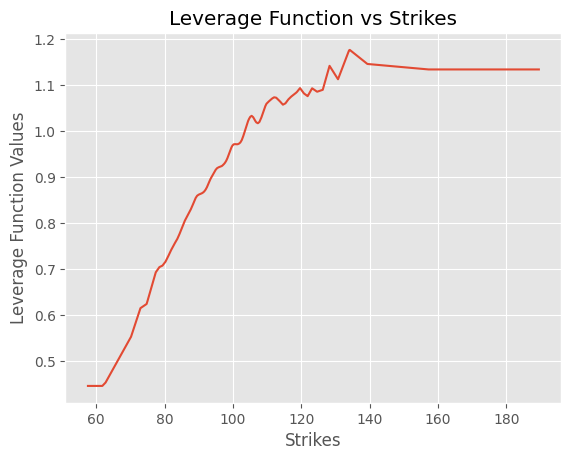

In [36]:
plt.plot(sorted_orig_logS,sorted_l_tS)
plt.title("Leverage Function vs Strikes")
plt.xlabel("Strikes")
plt.ylabel("Leverage Function Values")
plt.show()

In [37]:
def sim_St(S0,orig_logS,l_tS,Y,Z1,Z2,rho,timesteps,kappa=1,del_t=1/100,sigma0=0.15,sims=10000):
    logS = np.zeros((sims,timesteps))
    logS[:,0] = np.log(S0)

    new_l = np.zeros((sims,timesteps))
    new_l[:,0] = 1

    cond_rho = cond_rho_(rho,del_t,kappa)
    Z = np.sqrt(1 - cond_rho ** 2) * Z1 + cond_rho * Z2

    for i in range(1,timesteps):
        t2 = 0.5 * sigma0**2 * np.exp(2*Y[:,i-1]) * np.power(new_l[:,i-1], 2) * del_t
        t3 = sigma0 * np.exp(Y[:,i-1]) * new_l[:,i-1] * np.sqrt(del_t) * Z[:,i]
        logS[:,i] = logS[:,i-1] - t2 + t3

        sorted_indices = np.argsort(np.exp(orig_logS[:, i]))
        sorted_orig_logS = np.exp(orig_logS[sorted_indices, i])
        sorted_l_tS = l_tS[sorted_indices, i]

        # Interpolate/extrapolate for new spots
        cs = CubicSpline(sorted_orig_logS, sorted_l_tS, extrapolate=True)
        new_l[:, i] = cs(np.exp(logS[:, i]))


    return new_l, logS

In [38]:
N2 = 100000

# Need to simulate paths again
Z1 = np.random.normal(0,1,(N2,timesteps))
Z2 = np.random.normal(0,1,(N2,timesteps))

Y = simulate_Y(Y0,Z2,timesteps,del_t,gamma,kappa,N2)

new_l, logS_2 = sim_St(S0,logS,l,Y,Z1,Z2,rho,timesteps,kappa,del_t,sigma0,N2)

In [39]:
strikes = np.arange(60,160,10)
ivs = np.zeros(strikes.size)
call_prices = np.zeros(strikes.size)

for i,K in enumerate(strikes):
    ST = np.exp(logS_2[:,-1])
    payoff = np.maximum(0, ST - K)
    C = np.mean(payoff)
    call_prices[i] = C
    iv = blackscholes_impv(K, T=1, S=100, value=C, callput='call')
    ivs[i] = iv

In [40]:
for number, element in enumerate(strikes):
  print("For the strike", element,"the call price is", round(call_prices[number],2))

For the strike 60 the call price is 39.97
For the strike 70 the call price is 30.01
For the strike 80 the call price is 20.37
For the strike 90 the call price is 12.0
For the strike 100 the call price is 5.97
For the strike 110 the call price is 2.51
For the strike 120 the call price is 0.9
For the strike 130 the call price is 0.29
For the strike 140 the call price is 0.09
For the strike 150 the call price is 0.02


In [41]:
ivs

array([       nan, 0.12529993, 0.14740799, 0.14924686, 0.14989674,
       0.15016082, 0.15030765, 0.15119775, 0.15262879, 0.15258875])

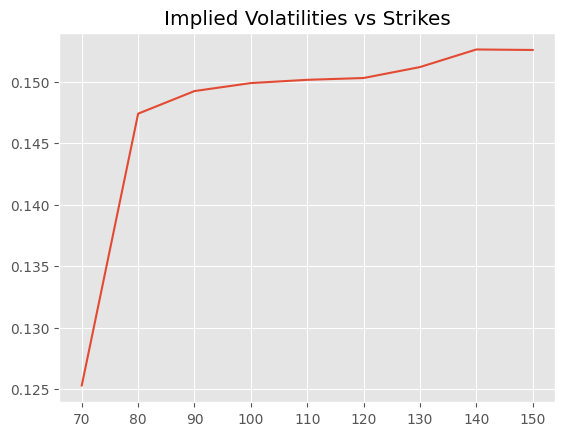

In [42]:
plt.plot(strikes, ivs)
plt.title("Implied Volatilities vs Strikes")
plt.show()

We see that the particle method of calibration works: we achieve the "market" volatility of a constant of 15%. We see that initially the leverage function, for lower strikes, is unable to calibrate accurately. As we get closer to ATM strikes, we see that the particle method produces an accurate smile.

Here, we observe that the implied volatility from the calibrated SLV model, simulated with a flat market smile of 15%, produces an almost flat smile when pricing vanilla European call options using 100,000 simulated paths. The smile is not perfectly flat due to the inherent randomness in the simulation and the variance in the random number generation. Additionally, the initial part of the curve, corresponding to lower strikes, deviates slightly from 15%, likely due to the lower vega in those option prices.

#### Part B
<b>(b).</b> Fix the spot-vol correlation $\rho = 0\%$ and mean reversion $\kappa=1$. We study the impact of volatility of volatility $\gamma$ on the smile in the pure stochastic volatility model and calibrated leverage function in the SLV model. Perform the following tasks with various values of $\gamma$. Suggested values of $\gamma$: $0\%$, $25\%$, $50\%$, $75\%$.
- Recalibrate the leverage function $l(t,S)$ for each $\gamma$, and plot the calibrated leverage function $l(t, S)$ as a function of the spot value $S$ for a fixed maturity, e.g., $t = T$ with various values of $\gamma$ in the same graph. Comment on the dependence of the shape of the leverage function on $\gamma$.
- Plot the corresponding smile at maturity $T$ for the pure stochastic volatility model (set the leverage function $l \equiv 1$) with the various values of $\gamma$ in the same graph. Comment on the dependence of the shape of the smile on $\gamma$.

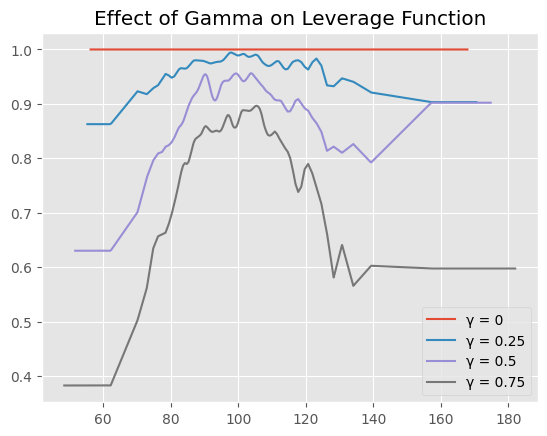

In [43]:
rho = 0
kappa = 1

gammas = [0,0.25,0.5,0.75]

Z1 = np.random.normal(0,1,(N,timesteps))
Z2 = np.random.normal(0,1,(N,timesteps))
for gamma in gammas:

    Y = simulate_Y(Y0,Z2,timesteps,del_t,gamma,kappa,N)
    at = sim_at(sigma0,Y)

    l, logS = particle_algo(S0,Y,at,rho,Z1,Z2,timesteps,del_t,kappa,sigma0,sigma0,sigma0,N)

    sorted_indices = np.argsort(np.exp(logS[:, -1]))
    sorted_orig_logS = np.exp(logS[sorted_indices, -1])
    sorted_l_tS = l[sorted_indices, -1]

    plt.plot(sorted_orig_logS,sorted_l_tS,label=f'\u03B3 = {gamma}')

plt.title("Effect of Gamma on Leverage Function")
plt.legend()
plt.show()

From the graph above we see that decreasing the vol-of-vol increases the values of the leverage value (pushes it towards 1) and reduces the curvature of the function.

In a more general sense, it can be inferred that the vol-of-vol helps the leverage function have more granularity.

In [44]:
def stochastic_vol(S0,Y,rho,Z1,Z2,timesteps,del_t=1/100,kappa=1,sigma0=0.15,sims=10000):
    cond_rho = cond_rho_(rho,del_t,kappa)
    Z = np.sqrt(1 - cond_rho ** 2) * Z1 + cond_rho * Z2

    logS = np.zeros((sims,timesteps))
    logS[:,0] = np.log(S0)

    for i in range(1,timesteps):
        t2 = 0.5 * sigma0**2 * np.exp(2*Y[:,i-1]) * del_t
        t3 = sigma0 * np.exp(Y[:,i-1]) * np.sqrt(del_t) * Z[:,i]
        logS[:,i] = logS[:,i-1] - t2 + t3

    return logS

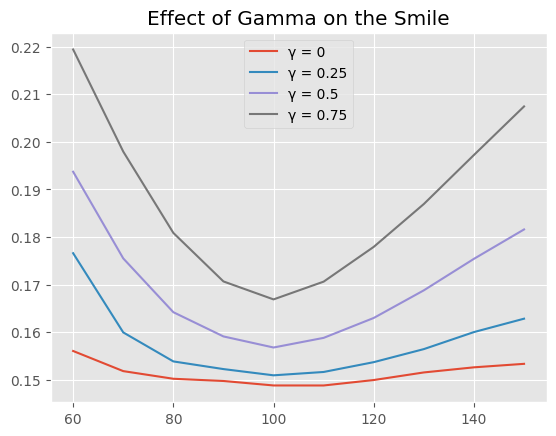

In [45]:
rho = 0
kappa = 1

gammas = [0,0.25,0.5,0.75]

Z1 = np.random.normal(0,1,(N,timesteps))
Z2 = np.random.normal(0,1,(N,timesteps))

for gamma in gammas:
    Y = simulate_Y(Y0,Z2,timesteps,del_t,gamma,kappa,N)

    logS_psv = stochastic_vol(S0,Y,rho,Z1,Z2,timesteps,del_t,kappa,sigma0,N)

    strikes = np.arange(60,160,10)
    ivs = np.zeros(strikes.size)
    call_prices = np.zeros(strikes.size)

    for i,K in enumerate(strikes):
        ST = np.exp(logS_psv[:,-1])
        payoff = np.maximum(0, ST - K)
        C = np.mean(payoff)
        call_prices[i] = C
        iv = blackscholes_impv(K, T=1, S=100, value=C, callput='call')
        ivs[i] = iv

    plt.plot(strikes, ivs, label=f'\u03B3 = {gamma}')

plt.title("Effect of Gamma on the Smile")
plt.legend()
plt.show()

As anticipated, the smile in the Pure SV model and the leverage function (plotted against the spot price) move in opposite directions, showing opposite slopes across different price ranges. This makes sense because, with a flat market smile, the leverage function in the SLV model counteracts the smile produced by the Pure SV model, pulling the overall smile toward a flat line.

The accompanying graph further solidifies this understanding. For high gamma values, the smile exceeds market levels and tapers off at the edges, indicating that with a vol-of-vol of 0.75, the model struggles to properly calibrate a flat market volatility, as expected. Similarly, the smile obtained with a gamma of 0.5 is unsatisfactory, as its minimum value does not approach the desired 15%. However, the smiles produced with the other two gamma values are more in line with expectations, tending toward the theoretical flat smile of 15%.

#### Part C
<b>(c).</b> Fix the volatility of volatility $\gamma = 50\%$ and mean reversion $\kappa=1$. We study the impact of spot-vol correlation $\rho$ on the smile in the pure stochastic volatility model and calibrated leverage function in the SLV model. Perform the following tasks with various values of $\rho$. Suggested values of $\rho$: $-50\%$, $0\%$, $50\%$.
- Recalibrate the leverage function $l(t,S)$ for each $\rho$, and plot the calibrated leverage function $l(t, S)$ as a function of the spot value $S$ for a fixed maturity, e.g., $t = T$ with various values of $\rho$ in the same graph. Comment on the dependence of the shape of the leverage function on $\rho$.
- Plot the corresponding smile at maturity $T$ for the pure stochastic volatility model (set the leverage function $l \equiv 1$) with the various values of $\rho$ in the same graph. Comment on the dependence of the shape of the smile on $\rho$.

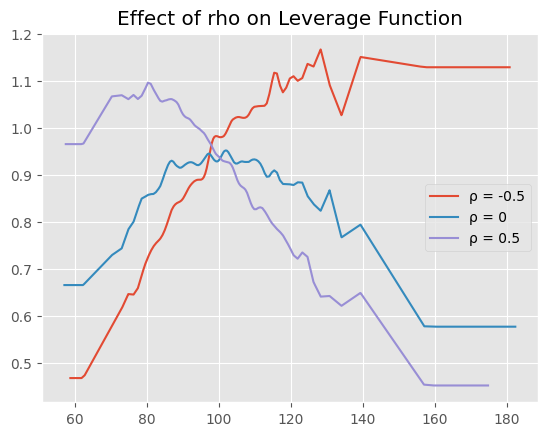

In [46]:
gamma = 0.5
kappa = 1
rhos = [-0.5, 0, 0.5]

for rho in rhos:
    Y = simulate_Y(Y0,Z2,timesteps,del_t,gamma,kappa,N)
    at = sim_at(sigma0,Y)

    l, logS = particle_algo(S0,Y,at,rho,Z1,Z2,timesteps,del_t,kappa,sigma0,sigma0,sigma0,N)

    sorted_indices = np.argsort(np.exp(logS[:, -1]))
    sorted_orig_logS = np.exp(logS[sorted_indices, -1])
    sorted_l_tS = l[sorted_indices, -1]

    plt.plot(sorted_orig_logS,sorted_l_tS,label=f'\u03C1 = {rho}')

plt.title("Effect of rho on Leverage Function")
plt.legend()
plt.show()

We know that for rho = 0, the leverage function is showing expected behaviour: it is pulling dowm the smile symmetrically in the wings. We see that the leverage function has maximum value ATM, where it tends to 1 since the vol is already close to the market vol ATM.

For the other two rho values, we see that there is skew in the leverage functions, but all three curves seem to take similar values for ATM strikes which is consistent with market theory.


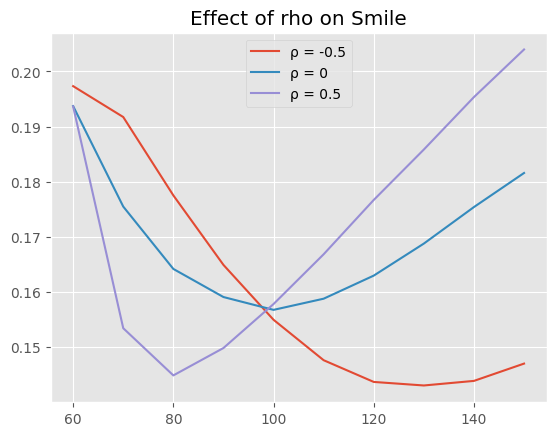

In [47]:
for rho in rhos:
    Y = simulate_Y(Y0,Z2,timesteps,del_t,gamma,kappa,N)

    logS_psv = stochastic_vol(S0,Y,rho,Z1,Z2,timesteps,del_t,kappa,sigma0,N)

    strikes = np.arange(60,160,10)
    ivs = np.zeros(strikes.size)
    call_prices = np.zeros(strikes.size)

    for i,K in enumerate(strikes):
        ST = np.exp(logS_psv[:,-1])
        payoff = np.maximum(0, ST - K)
        C = np.mean(payoff)
        call_prices[i] = C
        iv = blackscholes_impv(K, T=1, S=100, value=C, callput='call')
        ivs[i] = iv

    plt.plot(strikes, ivs, label=f'\u03C1 = {rho}')

plt.title("Effect of rho on Smile")
plt.legend()
plt.show()

Here, for rho = 0, which means zero spot-vol correlation, we get our best fit. We see that when there is correlation between the spot and vol, the ends of the curves taper off quite a bit from the market fit. This reiterates how the leverage function works against the SV function in this case.

#### Part D
<b>(d).</b> Fix the spot-vol correlation $\rho = 0\%$ and volatility of volatility $\gamma = 50\%$. We study the impact of mean reversion $\kappa$ on the smile in the pure stochastic volatility model and calibrated leverage function in the SLV model. Perform the following tasks with various values of $\kappa$. Suggested values of $\kappa$: $0.1$, $1$, $10$.
- Recalibrate the leverage function $l(t,S)$ for each $\gamma$, and plot the calibrated leverage function $l(t, S)$ as a function of the spot value $S$ for a fixed maturity, e.g., $t = T$ with various values of $\gamma$ in the same graph. Comment on the dependence of the shape of the leverage function on $\kappa$.
- Plot the corresponding smile at maturity $T$ for the pure stochastic volatility model (set the leverage function $l \equiv 1$) with the various values of $\kappa$ in the same graph. Comment on the dependence of the shape of the smile on $\kappa$.

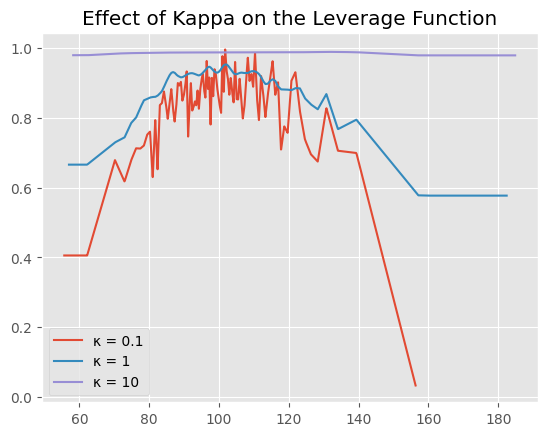

In [48]:
rho = 0
gamma = 0.5
kappas = [0.1,1,10]

for kappa in kappas:
    Y = simulate_Y(Y0,Z2,timesteps,del_t,gamma,kappa,N)
    at = sim_at(sigma0,Y)

    l, logS = particle_algo(S0,Y,at,rho,Z1,Z2,timesteps,del_t,kappa,sigma0,sigma0,sigma0,N)

    sorted_indices = np.argsort(np.exp(logS[:, -1]))
    sorted_orig_logS = np.exp(logS[sorted_indices, -1])
    sorted_l_tS = l[sorted_indices, -1]

    plt.plot(sorted_orig_logS,sorted_l_tS,label=f'\u03BA = {kappa}')

plt.title("Effect of Kappa on the Leverage Function")
plt.legend()
plt.show()

The mean reversion factor directly affects the value of the leverage function. For slow mean reversion, the function is much more granular, and has ends that taper off in an unstable manner, reaching 0 as well.

For faster mean reversion, which ideally should produce the best smile results since the market vol has a constant mean of 15%, has flatter leverage functions and much smoother shapes.

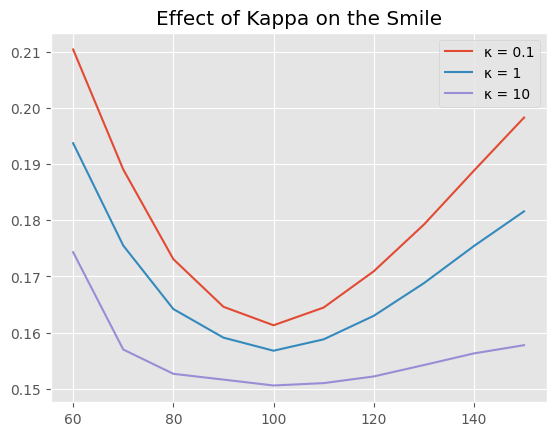

In [49]:
for kappa in kappas:
    Y = simulate_Y(Y0,Z2,timesteps,del_t,gamma,kappa,N)

    logS_psv = stochastic_vol(S0,Y,rho,Z1,Z2,timesteps,del_t,kappa,sigma0,N)

    strikes = np.arange(60,160,10)
    ivs = np.zeros(strikes.size)
    call_prices = np.zeros(strikes.size)

    for i,K in enumerate(strikes):
        ST = np.exp(logS_psv[:,-1])
        payoff = np.maximum(0, ST - K)
        C = np.mean(payoff)
        call_prices[i] = C
        iv = blackscholes_impv(K, T=1, S=100, value=C, callput='call')
        ivs[i] = iv

    plt.plot(strikes, ivs, label=f'\u03BA = {kappa}')
plt.title("Effect of Kappa on the Smile")
plt.legend()
plt.show()

We see that the kappa values' smiles are in line with what we saw in our leverage function graphs. The fast mean reversion has the best fit, with vols consistently between 0.14 and 0.15. The slowest mean reversion has a streak of values that do not fit the expected behaviour, tapering off to values as high as 0.22.

#### Part E

<b>(e).</b> Consider the forward-starting straddle with payoff
\begin{equation*}
\left\vert \frac{S_{T_2}}{S_{T_1}}-1 \right\vert
\end{equation*}
with $T_1 = T - \frac{3}{12}$, $T_2 = T$. Use $\gamma = 100\%$, $\rho = -50\%$ and $\kappa=1$. Compare the prices of this option in the Black-Scholes model with volatility 15% and in the calibrated SLV model. Comment on the result. Why is it of interest to use stochastic local volatility models for pricing derivatives?

In [50]:
def simulate_bs(S0,sigma,del_t,timesteps,T=1,r=0,sims=10000):
    Z = np.random.normal(0,1,(sims,timesteps))

    S = np.zeros((sims, timesteps))
    S[:,0] = S0

    for i in range(1,timesteps):
        S[:,i] = S[:,i-1] * np.exp((r - 0.5 * sigma**2)*del_t + sigma * np.sqrt(del_t) * Z[:,i])

    return S

Straddle Price in the BS Model

In [51]:
T = 1
n = 100
del_t = 1/n
timesteps = n+1
sigma = 0.15
S0 = 100
S = simulate_bs(S0,sigma,del_t,timesteps)

T1 = int((T - 3/12) / del_t)
straddle_payoff = np.mean(np.abs(S[:-1]/S[T1] - 1))

bs_straddle_price = straddle_payoff
print(bs_straddle_price)

0.09097472423592579


Straddle Price in the callibrated SLV Model

In [52]:
# logS is the log price of the asset in the callibrated SLV model from Part a

ST2 = np.exp(logS[:,-1])
ST1 = np.exp(logS[:,T1])

straddle_payoff_slv = np.mean(np.abs(ST2/ST1 - 1))

slv_straddle_price = straddle_payoff_slv
print(slv_straddle_price)

0.059241873143966214


The price of a forward-starting straddle in the SLV model is lower than in the Black-Scholes model. Although the difference is minimal due to the SLV model being calibrated to a flat market smile, the key distinction lies in how the SLV model accounts for the fact that the underlying asset's volatility fluctuates over time, rather than being constant. This dynamic nature of volatility, even with calibration to the implied market smile, leads to a lower price in our example.

SLV models are valuable for pricing derivatives because they do not assume constant volatility and can capture the evolving nature of volatility. These models are practical for trading applications, as they provide a Markovian representation of the spot price and the state variables of the underlying stochastic volatility model, all while maintaining calibration to the vanilla option smile. Unlike local volatility models, SLV models offer the advantage of managing spot/volatility and volatility/volatility break-even levels, making them more versatile in terms of pricing and risk management.

For a given market smile, SLV models also provide insights into break-even levels for vol-of-vol, spot/volatility correlations, and how these factors shift when the market smile changes. This capability is crucial for effectively managing risk in derivative positions over time. As a result, SLV models are particularly useful for pricing and managing the risks associated with path-dependent payoffs, such as the forward-starting straddle we discussed earlier.

---
Thank you!